DLPFC_multi_slice

In [1]:
import random
import numpy as np
import scanpy as sc
import torch
import argparse
import yaml
from yaml import SafeLoader
from package.data_processing import LoadBatchAdata
from package.model import STAMGC
import warnings


warnings.filterwarnings('ignore')
import os
os.chdir('/home/lsfcj/lsf/第一个工作3.0')

In [2]:
file_fold='/data/lsfcj/DATA'

args = argparse.Namespace(
    catalogue='Multi_slice',
    dataset='DLPFC',
    parameter='10x_integration_vertical',
    slice_list=['151507','151508'],#'151507','151508',
    batch_size=2,
    path3='/DLPFC_0708',
    platform='10x',
    spot_size=100,
    config='./train_config.yaml',
    label=True,
)
config = yaml.load(open(args.config), Loader=SafeLoader)[str(args.catalogue)][str(args.parameter)]

path = os.path.join(file_fold, args.dataset)

torch.manual_seed(config['seed'])
np.random.seed(config['seed'])
if torch.cuda.is_available():
    torch.cuda.manual_seed(config['seed'])
    torch.cuda.manual_seed_all(config['seed'])
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
random.seed(12345)
os.environ['CUBLAS_WORKSPACE_CONFIG'] = ':4096:8' 
torch.use_deterministic_algorithms(True)

In [3]:
# adata=LoadBatchAdata(path,args.catalogue,args.dataset,args.slice_list,config,args,path3=args.path3).run()
# print(adata)

In [4]:
adata=sc.read_h5ad('./results/'+args.catalogue+'/'+args.dataset+args.path3+'/data_processing.h5ad')
print(adata)

AnnData object with n_obs × n_vars = 8602 × 3000
    obs: 'in_tissue', 'array_row', 'array_col', 'ground_truth', 'slice'
    var: 'n_cells', 'n_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'log1p', 'smooth_r', 'spatial'
    obsm: 'gene_feat', 'graph_neigh', 'smooth_gene', 'spatial'


=== Generate pseudo labels! ===


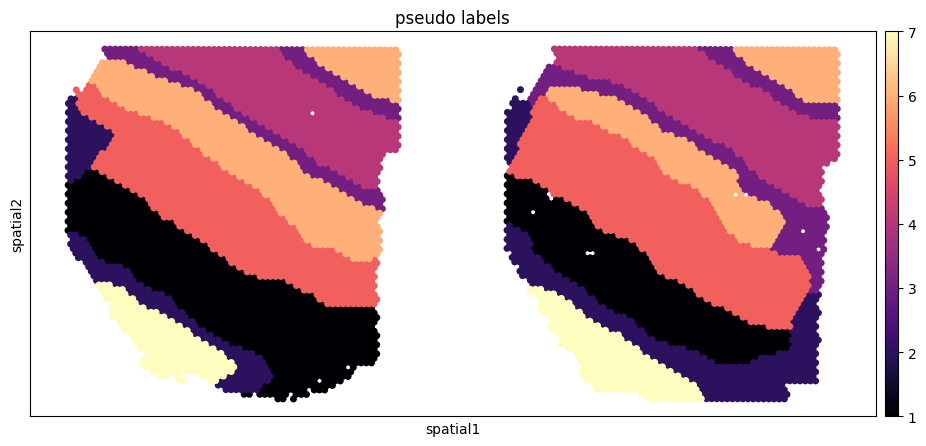

=== train ===
epoch: 0  total_loss: 12.332270622253418  alpha: 8  beta: 0.3  gama: 0.7
epoch: 1  total_loss: 12.111166000366211  alpha: 8  beta: 0.3  gama: 0.7
epoch: 2  total_loss: 11.988851547241211  alpha: 8  beta: 0.3  gama: 0.7
epoch: 3  total_loss: 11.824539184570312  alpha: 8  beta: 0.3  gama: 0.7
epoch: 4  total_loss: 11.636293411254883  alpha: 8  beta: 0.3  gama: 0.7
epoch: 5  total_loss: 11.4775390625  alpha: 8  beta: 0.3  gama: 0.7
epoch: 6  total_loss: 11.335095405578613  alpha: 8  beta: 0.3  gama: 0.7
epoch: 7  total_loss: 11.179675102233887  alpha: 8  beta: 0.3  gama: 0.7
epoch: 8  total_loss: 11.06506633758545  alpha: 8  beta: 0.3  gama: 0.7
epoch: 9  total_loss: 10.954590797424316  alpha: 8  beta: 0.3  gama: 0.7
epoch: 10  total_loss: 10.866406440734863  alpha: 8  beta: 0.3  gama: 0.7
epoch: 11  total_loss: 10.794076919555664  alpha: 8  beta: 0.3  gama: 0.7
epoch: 12  total_loss: 10.737897872924805  alpha: 8  beta: 0.3  gama: 0.7
epoch: 13  total_loss: 10.69589805603027

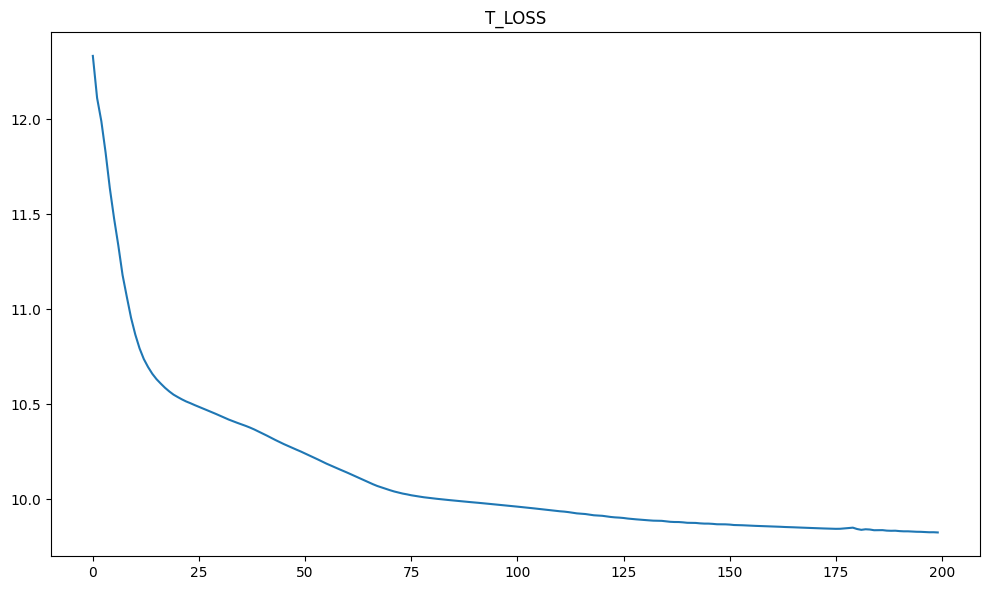

=== load ===
embedding generated, go clustering
calculate metric ARI
ARI: 0.5448437809959332
NMI: 0.662740567608531


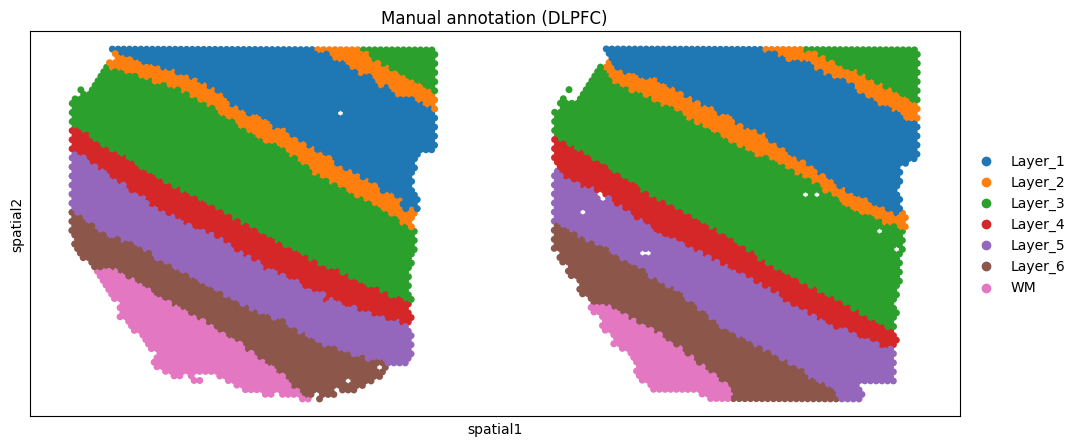

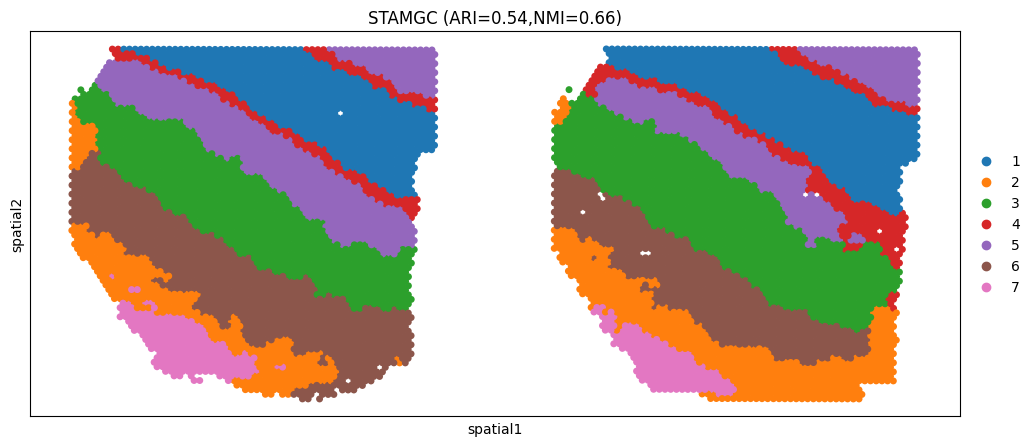

complete!


In [5]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12, 5)
adata=STAMGC(adata,config,args,path3=args.path3).run()

In [6]:
# adata=sc.read_h5ad('./results/Multi_slice/'+args.dataset+args.path3+'/STAMGC.h5ad')
# print(adata)

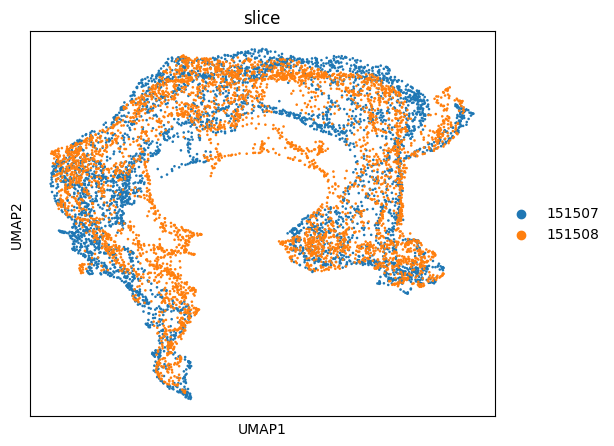

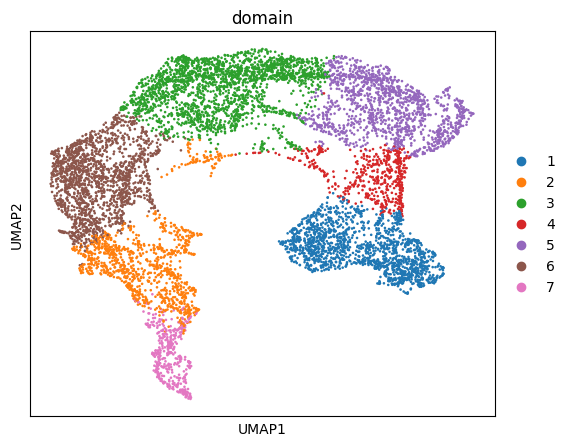

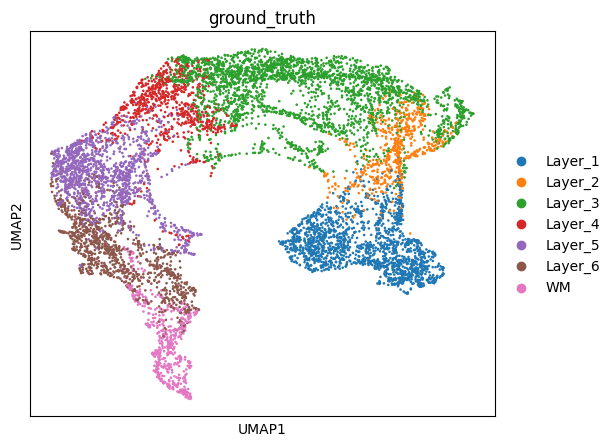

In [7]:
color=['slice','domain','ground_truth']
sc.pp.neighbors(adata, use_rep='z', metric='cosine')
sc.tl.umap(adata)
for i in color:
    fig, ax = plt.subplots(figsize=(6, 5))
    sc.pl.umap(adata, color=i,ax=ax, show=False)
    plt.savefig('./results/'+args.catalogue+'/'+args.dataset+args.path3+'/'+i+'_umap.png', bbox_inches='tight',dpi=600)
    plt.show()
    plt.close(fig)